# Mão na massa - Aula 1

In [1]:
url = '/content/drive/MyDrive/Alura/Cursos/3773 - TensorFlow Keras: Classificando imagens com redes convolucionais/Projeto/corais'

In [2]:
import pathlib

In [3]:
data_dir=pathlib.Path(url)

In [4]:
import tensorflow as tf

In [5]:
batch_size = 64
altura = 128
largura = 128

In [6]:
treino = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=171,
    image_size=(altura,largura),
    batch_size=batch_size
)

Found 923 files belonging to 2 classes.
Using 739 files for training.


In [7]:
validacao = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=171,
    image_size=(altura,largura),
    batch_size=batch_size
)

Found 923 files belonging to 2 classes.
Using 184 files for validation.


In [8]:
treino.class_names

['bleached_corals', 'healthy_corals']

# Mão na massa - Aula 2

In [9]:
tf.random.set_seed(245)

In [10]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  #
])


In [11]:
# Compilando o modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',  # Use 'binary_crossentropy' porque o problema é binário
              metrics=['accuracy'])

In [12]:
epocas =10

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas
)

Epoch 1/10
12/12 [==============================] - 103s 3s/step - loss: 3.4443 - accuracy: 0.4831 - val_loss: 2.5947 - val_accuracy: 0.4674
Epoch 2/10
12/12 [==============================] - 5s 265ms/step - loss: 1.0580 - accuracy: 0.5846 - val_loss: 0.7039 - val_accuracy: 0.6467
Epoch 3/10
12/12 [==============================] - 5s 261ms/step - loss: 0.6192 - accuracy: 0.6888 - val_loss: 0.5892 - val_accuracy: 0.6848
Epoch 4/10
12/12 [==============================] - 5s 270ms/step - loss: 0.5276 - accuracy: 0.7212 - val_loss: 0.6237 - val_accuracy: 0.6522
Epoch 5/10
12/12 [==============================] - 5s 222ms/step - loss: 0.6783 - accuracy: 0.6712 - val_loss: 0.6562 - val_accuracy: 0.6739
Epoch 6/10
12/12 [==============================] - 4s 211ms/step - loss: 0.6272 - accuracy: 0.7023 - val_loss: 0.5871 - val_accuracy: 0.7065
Epoch 7/10
12/12 [==============================] - 6s 305ms/step - loss: 0.5662 - accuracy: 0.7226 - val_loss: 0.6261 - val_accuracy: 0.7065
Epoch 8

In [13]:
import matplotlib.pyplot as plt

In [14]:
def plota_resultados(history,epocas):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  intervalo_epocas = range(epocas)
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(intervalo_epocas, acc, label='Acurácia do Treino')
  plt.plot(intervalo_epocas, val_acc, label='Acurácia da Validação')
  plt.legend(loc='lower right')


  plt.subplot(1, 2, 2)
  plt.plot(intervalo_epocas, loss, label='Custo do Treino')
  plt.plot(intervalo_epocas, val_loss, label='Custo da Validação')
  plt.legend(loc='upper right')
  plt.show()

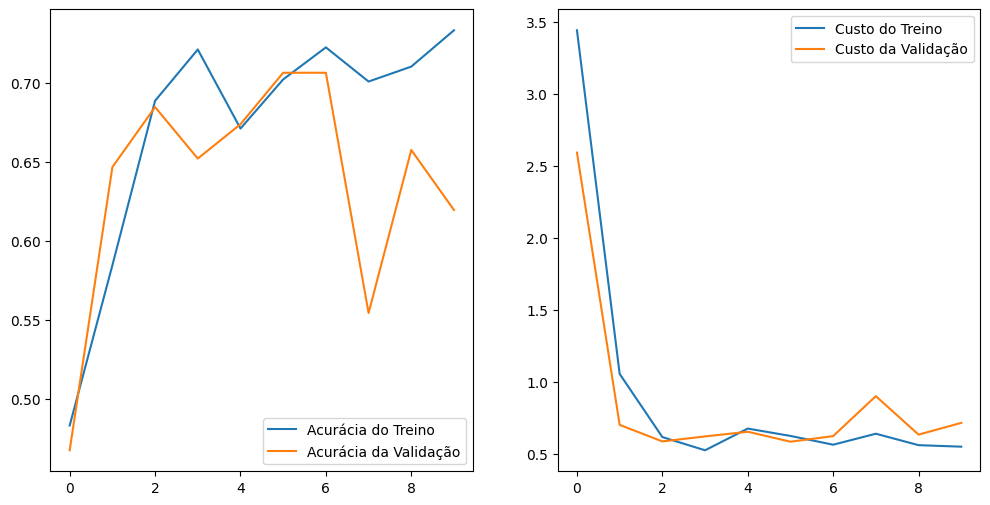

In [15]:
plota_resultados(history,epocas)

# Mão na massa - Aula 3

In [23]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [24]:
# Compilando o modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',  # Use 'binary_crossentropy' porque o problema é binário
              metrics=['accuracy'])

In [25]:
epocas =10

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas
)

Epoch 1/10
12/12 [==============================] - 21s 2s/step - loss: 0.9040 - accuracy: 0.5602 - val_loss: 0.6675 - val_accuracy: 0.5217
Epoch 2/10
12/12 [==============================] - 21s 2s/step - loss: 0.6375 - accuracy: 0.6333 - val_loss: 0.5964 - val_accuracy: 0.7065
Epoch 3/10
12/12 [==============================] - 19s 1s/step - loss: 0.5795 - accuracy: 0.6969 - val_loss: 0.5573 - val_accuracy: 0.7391
Epoch 4/10
12/12 [==============================] - 19s 1s/step - loss: 0.5371 - accuracy: 0.7240 - val_loss: 0.5253 - val_accuracy: 0.7337
Epoch 5/10
12/12 [==============================] - 20s 2s/step - loss: 0.5112 - accuracy: 0.7375 - val_loss: 0.5452 - val_accuracy: 0.7011
Epoch 6/10
12/12 [==============================] - 19s 1s/step - loss: 0.5035 - accuracy: 0.7537 - val_loss: 0.5066 - val_accuracy: 0.7337
Epoch 7/10
12/12 [==============================] - 20s 1s/step - loss: 0.4521 - accuracy: 0.7876 - val_loss: 0.5110 - val_accuracy: 0.7337
Epoch 8/10
12/12 [==

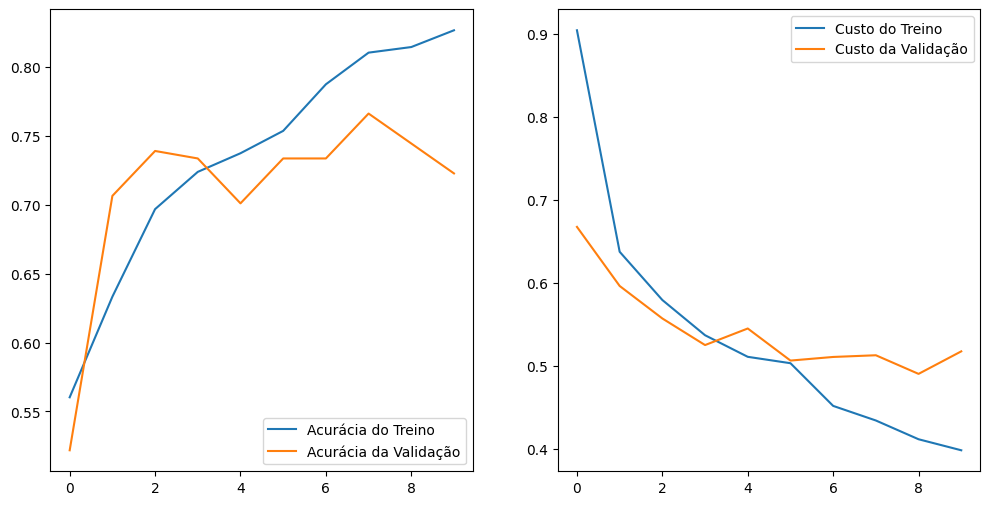

In [26]:
plota_resultados(history,epocas)